# 資料準備

In [1]:
# 匯入Keras及相關模組
import numpy as np
import pandas as pd
from keras.utils import np_utils # 後續label轉換成One-hot encoding
np.random.seed(10)

Using TensorFlow backend.


# 資料預處理

In [2]:
from keras.datasets import mnist
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

In [3]:
# -----匯入資料-----
train_data=pd.read_csv("train.csv",encoding="big5")
test_data=pd.read_csv("test.csv",encoding="big5")

print('train_data長度 :',len(train_data))
print('test_data長度 :',len(test_data))

train_data長度 : 42000
test_data長度 : 28000


In [4]:
# 處理訓練資料

train_image=(train_data.iloc[:,1:].values).astype('float32')
train_label=(train_data.iloc[:,0].values).astype('int32')
x_train = train_image.reshape(42000, 28, 28).astype('float32')

print ('train_image:',train_image.shape)
print ('train_label:',train_label.shape)
print ('x_train:',x_train.shape)

x_train_image = np.concatenate([x_Train, x_train])
y_train_label = np.concatenate([y_Train, train_label])

print ('x_train_image:',x_train_image.shape)
print ('y_train_label:',y_train_label.shape)


train_image: (42000, 784)
train_label: (42000,)
x_train: (42000, 28, 28)
x_train_image: (102000, 28, 28)
y_train_label: (102000,)


In [5]:
# 處理測試資料

x_test = test_data.values.astype('float32')
x_test_image= x_test.reshape(28000, 28, 28).astype('float32')
y_test_label=(test_data.iloc[:,0].values).astype('int32')

print ('x_test:',x_test.shape)
print ('x_test_image:',x_test_image.shape)
print ('y_test_label:',y_test_label.shape)


x_test: (28000, 784)
x_test_image: (28000, 28, 28)
y_test_label: (28000,)


In [6]:
# 定義plot_image function以顯示影像
import matplotlib.pyplot as plt
train_img = np.reshape(x_train_image[:1, :], (28, 28))
plt.matshow(train_img, cmap = plt.get_cmap('binary'))
plt.show()

<Figure size 480x480 with 1 Axes>

In [7]:
# 查看第0筆labels資料
y_train_label[0]

5

In [8]:
# Input shape format: (28, 28, 1)  , 其中 1 為黑白照片
# If 128x128 RGB三顏色, 需設定 (128,128,3)
x_Train4D=x_train_image.reshape(x_train_image.shape[0],28,28,1).astype('float32')   # Convolution layer需要的格式
x_Test4D=x_test_image.reshape(x_test_image.shape[0],28,28,1).astype('float32')

In [9]:
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [10]:
x_Train4D_normalize.shape

(102000, 28, 28, 1)

In [11]:
# one-hot encoding
y_TrainOneHot = np_utils.to_categorical(y_train_label)

In [12]:
# 建立plot_images_labels_prediction function查看多筆訓練資料
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,
                                  prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

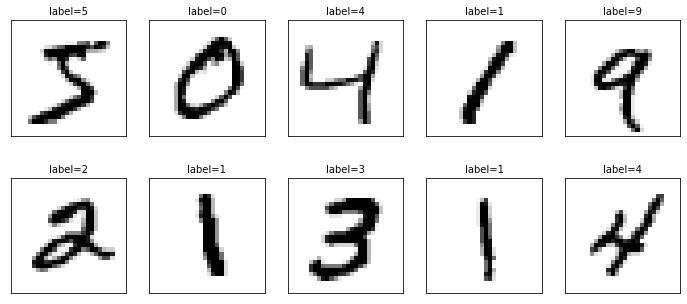

In [13]:
# 查看前十筆資料
plot_images_labels_prediction(x_train_image,y_train_label,[],0,10)

In [14]:
# # 查看測試資料 (由images及labels組成)
print ('x_test_image:',x_test_image.shape)
print ('y_test_label:',y_test_label.shape)

x_test_image: (28000, 28, 28)
y_test_label: (28000,)


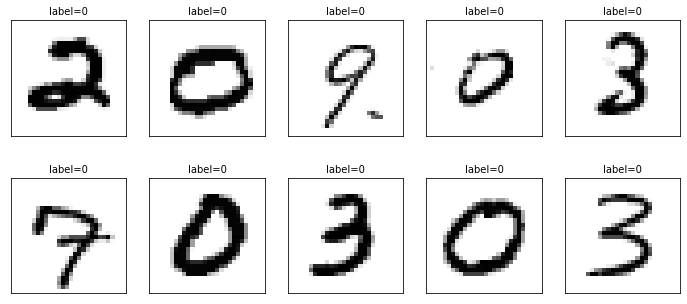

In [15]:
plot_images_labels_prediction(x_test_image,y_test_label,[],0,10)

# 建立模型 CNN+MLP

In [16]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [17]:
model = Sequential()

#第一層
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 strides=1,
                 padding='same', 
                 input_shape=(28,28,1), 
                 activation='relu'))
# filters:濾鏡數量
# kernel_size: 濾鏡⼤⼩ 
# strides:步幅(width,height)或單⼀數值   (1*1 或1都可以)
# padding:same與input shape相同, 使經過濾鏡後的矩陣不會愈來愈⼩; valid-不使⽤padding
# kernel_initializer:初始weights⽅法
# activation:relu’etc.

model.add(MaxPooling2D(pool_size=(2, 2)))
# pool_size: pool⼤⼩
# strides:步幅(width,height)或單⼀數值,None=pool_size
# padding:same’-與input shape相同,‘valid’-不使⽤padding

#第二層
model.add(Conv2D(filters=36, kernel_size=(5,5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Full connection
model.add(Flatten())  # Flatten層: 一維
model.add(Dense(128, activation='relu', kernel_initializer='normal'))
model.add(Dropout(0.4))

model.add(Dense(10,activation='softmax'))  # 多分類使用softmax, 有10個output, 分別為0, 1, 2, ...9

In [18]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

# 訓練模型

In [19]:
# 定義訓練方式
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [20]:
# 開始訓練, 80%訓練, 20%驗證, 執行20次訓練週期, 每次300筆資料
# By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch.
#'verbose=0' will show you nothing (silent)
#'verbose=1' will show you an animated progress bar 
#'verbose=2' will just mention the number of epoch
train_history=model.fit(x=x_Train4D_normalize, 
                        y=y_TrainOneHot,validation_split=0.2, 
                        epochs=30, batch_size=1000,verbose=5)

Train on 81600 samples, validate on 20400 samples
Epoch 1/30
 - 91s - loss: 0.4045 - accuracy: 0.8739 - val_loss: 0.0801 - val_accuracy: 0.9753
Epoch 2/30
 - 92s - loss: 0.1043 - accuracy: 0.9686 - val_loss: 0.0524 - val_accuracy: 0.9837
Epoch 3/30
 - 91s - loss: 0.0748 - accuracy: 0.9775 - val_loss: 0.0420 - val_accuracy: 0.9875
Epoch 4/30
 - 118s - loss: 0.0613 - accuracy: 0.9815 - val_loss: 0.0343 - val_accuracy: 0.9889
Epoch 5/30
 - 112s - loss: 0.0494 - accuracy: 0.9851 - val_loss: 0.0283 - val_accuracy: 0.9911
Epoch 6/30
 - 99s - loss: 0.0425 - accuracy: 0.9871 - val_loss: 0.0268 - val_accuracy: 0.9915
Epoch 7/30
 - 101s - loss: 0.0386 - accuracy: 0.9883 - val_loss: 0.0229 - val_accuracy: 0.9925
Epoch 8/30
 - 102s - loss: 0.0352 - accuracy: 0.9892 - val_loss: 0.0198 - val_accuracy: 0.9938
Epoch 9/30
 - 96s - loss: 0.0316 - accuracy: 0.9904 - val_loss: 0.0204 - val_accuracy: 0.9936
Epoch 10/30
 - 92s - loss: 0.0290 - accuracy: 0.9909 - val_loss: 0.0192 - val_accuracy: 0.9941
Epoch

# 以圖形顯示訓練過程

In [21]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

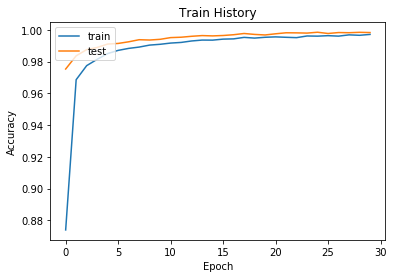

In [22]:
# 畫出accuracy結果
show_train_history('accuracy','val_accuracy')

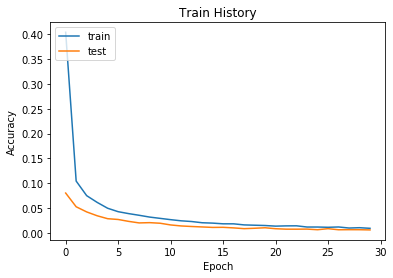

In [23]:
# 畫出loss結果
show_train_history('loss','val_loss')

# 評估模型準確率

In [24]:
#scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
#scores[1]

# 進行預測

In [25]:
prediction=model.predict_classes(x_Test4D_normalize)

In [26]:
# 預測結果
prediction[:10]

array([2, 0, 9, 0, 3, 7, 0, 3, 0, 3], dtype=int64)

# 查看預測結果 

In [27]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10) 
        
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

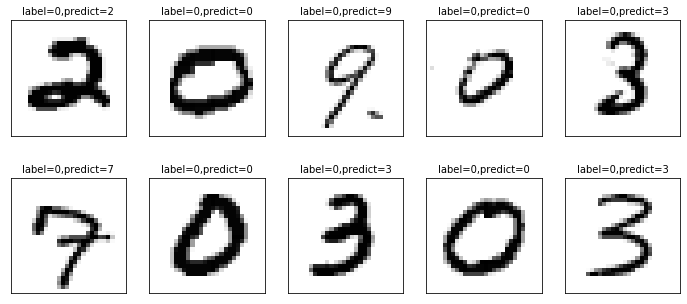

In [28]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=0)

# confusion matrix

In [29]:
import pandas as pd
pd.crosstab(y_test_label,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,2771,3200,2815,2792,2745,2514,2737,2890,2762,2774


In [30]:
from sklearn.metrics import classification_report

y_pred = model.predict_classes(x_Test4D_normalize)
print(classification_report(y_test_label, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.10      0.18     28000
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.10     28000
   macro avg       0.10      0.01      0.02     28000
weighted avg       1.00      0.10      0.18     28000



C:\Users\student\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


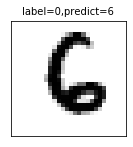

In [31]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=340,num=1)

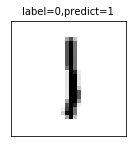

In [32]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=1289,num=1)

# 產生檔案

In [33]:
predictions = model.predict_classes(x_Test4D_normalize, verbose=0)

submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                          "Label": predictions})
submissions.to_csv('mResult_1219_1.csv', index=False, header=True)
submissions.sample(5)

,ImageId,Label
14902,14903,7
17172,17173,4
19407,19408,8
4886,4887,9
10642,10643,7
